통계적 사고 (2판) 연습문제 ([thinkstats2.com](thinkstats2.com), [think-stat.xwmooc.org](http://think-stat.xwmooc.org))<br>
Allen Downey / 이광춘(xwMOOC)

임신 파일을 읽어들이시오.

In [36]:
%matplotlib inline

import nsfg
preg = nsfg.ReadFemPreg()

정상출산을 고르고 나서, <tt>totalwgt_lb</tt>에 대한 CDF를 생성하시오.

In [37]:
import thinkstats2
live = preg[preg.outcome==1]
firsts = live[live.birthord==1]
others = live[live.birthord>1]
cdf = thinkstats2.Cdf(live.totalwgt_lb)

CDF를 화면에 출력하시오.

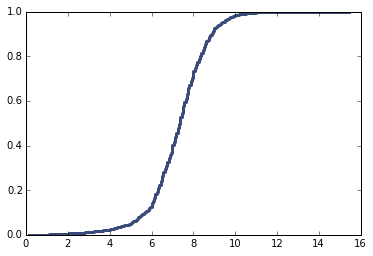

In [38]:
import thinkplot
thinkplot.Cdf(cdf, label='totalwgt_lb')
thinkplot.Show(loc='lower right')

할 수 있다면, 출생당시 여러분이 얼마나 체중이 나가는지 알아내고, CDF(x)를 계산하시오.

In [39]:
cdf.Prob(3.4*2.2) # 1Kg = 2.204623 lb (Kg, 파운드 무게변환)

0.54414693516264656

만약 여러분이 첫째라면, 첫번째 아기에 대한 CDF에서 출생체중을 찾아보시오; 첫째가 아니라면, 첫째가 아닌 아기에 대한 CDF를 사용하시오.

In [40]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb)
print('If I am the other baby, ', first_cdf.Prob(3.4*2.2))
other_cdf = thinkstats2.Cdf(others.totalwgt_lb)
print('If I am the first baby, ', other_cdf.Prob(3.4*2.2)) 

('If I am the other baby, ', 0.56451982580793036)
('If I am the first baby, ', 0.5251336898395722)


출생체중에 대한 백분위순위를 계산하시오.

In [41]:
cdf.PercentileRank(3.4*2.2)

54.414693516264656

p=0.5와 연관된 값을 찾아서 출생체중 중위를 계산하시오.

In [42]:
cdf.Value(0.5)

7.375

25 백분위수와 75 백분위수를 계산해서 사분위수 범위를 계산하시오.

In [43]:
print('75 Percentile ', cdf.Percentile(25))
print('25 Percentile ', cdf.Percentile(75))

('75 Percentile ', 6.5)
('25 Percentile ', 8.125)


<tt>cdf</tt>에서 무작위 선택을 하시오.

In [44]:
cdf.Random()

7.0

<tt>cdf</tt>에서 무작위 표본을 뽑으시오.

In [45]:
cdf.Sample(5)

array([ 8.0625,  8.6875,  1.5625,  7.5   ,  8.    ])

<tt>cdf</tt>에서 무작위 표본을 뽑고나서, 각 값에 대한 백분위수를 계산하고, 백분위순위 분포를 도식화하시오.

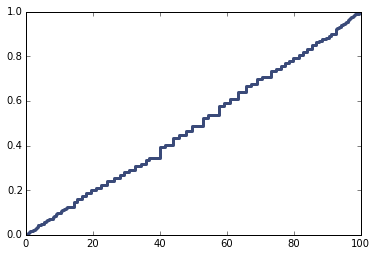

In [46]:
sample = [cdf.PercentileRank(x) for x in cdf.Sample(1000)]
cdf2 = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf2)
thinkplot.Show(legend=False)

<tt>random.random()</tt>을 사용해서 1000 난수를 생성하고, 난수의 PMF를 도식화하시오.

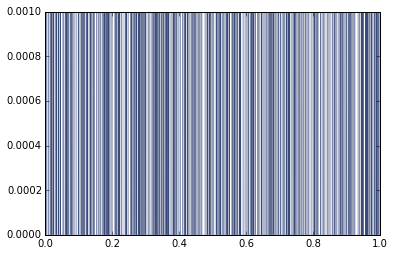

In [47]:
import random
t = [random.random() for _ in range(1000)]
pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Show()

PMF가 잘 동작하지 않는다고 가정하고, 대신에 CDF 도식화를 시도하시오.

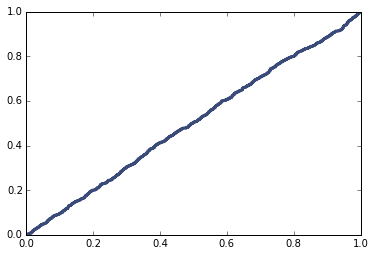

In [48]:
cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Show()